<div style="background-color: #7b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 40px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">SPORTS PROJECT STORY
</h1>
</div>

<div style="background-color: #3b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 20px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">TECH TITANS
</h1>
</div>

In [18]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA correctly


In [19]:
df=pd.read_csv("cleaned_sports_dataset.csv")

# PROBLEM STATEMENT 2

### POSITION ANALYSIS

The goal of position analysis in this context is to understand the distribution of players across different positions on the field (like Defender, Forward, Midfielder, Goalkeeper). Analysis is based on:

1. Which position has the most players?

2. Which position has the fewest players?

3. Is the distribution of players across positions even or skewed?

4. Does the distribution of players across positions significantly differ from what we'd expect if the distribution was completely random (uniform)?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


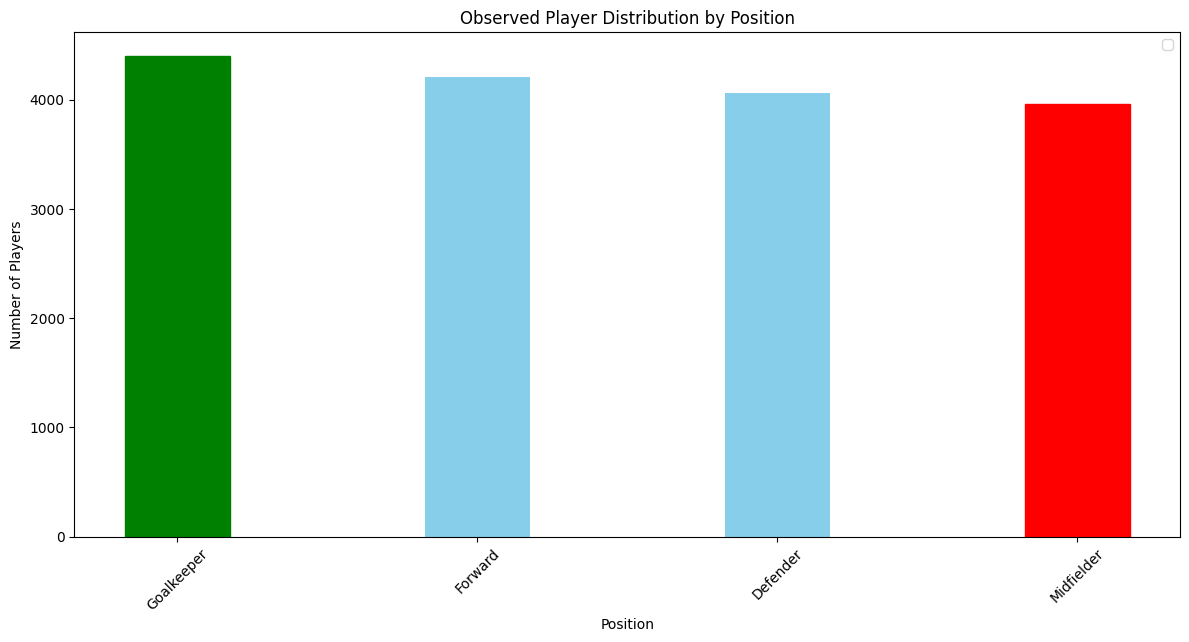

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data
# Count players per position
position_counts = df["Position"].value_counts()

# Bar plot for observed frequencies
positions = position_counts.index
observed_values = position_counts.values

x = np.arange(len(positions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for observed frequencies
bars = ax.bar(x, observed_values, width, color='skyblue')

# Find the index of the highest and lowest observed values
highest_index = np.argmax(observed_values)
lowest_index = np.argmin(observed_values)

# Mark the highest and lowest bars with green and red respectively
bars[highest_index].set_color('green')
bars[lowest_index].set_color('red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Position')
ax.set_ylabel('Number of Players')
ax.set_title('Observed Player Distribution by Position')
ax.set_xticks(x)
ax.set_xticklabels(positions)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


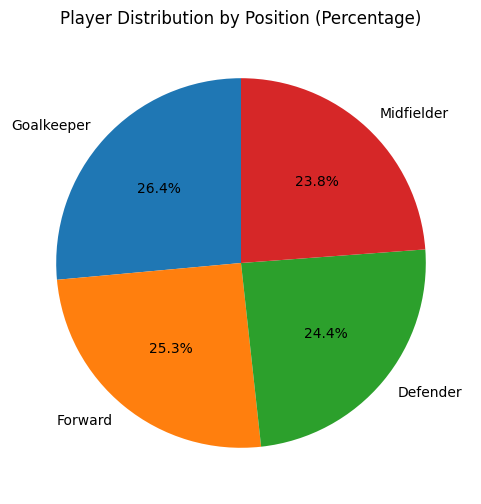

In [21]:
# Calculate percentage distribution
percentage_distribution = position_counts / len(df) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, 
        autopct='%1.1f%%', startangle=90)
plt.title("Player Distribution by Position (Percentage)")
plt.show()

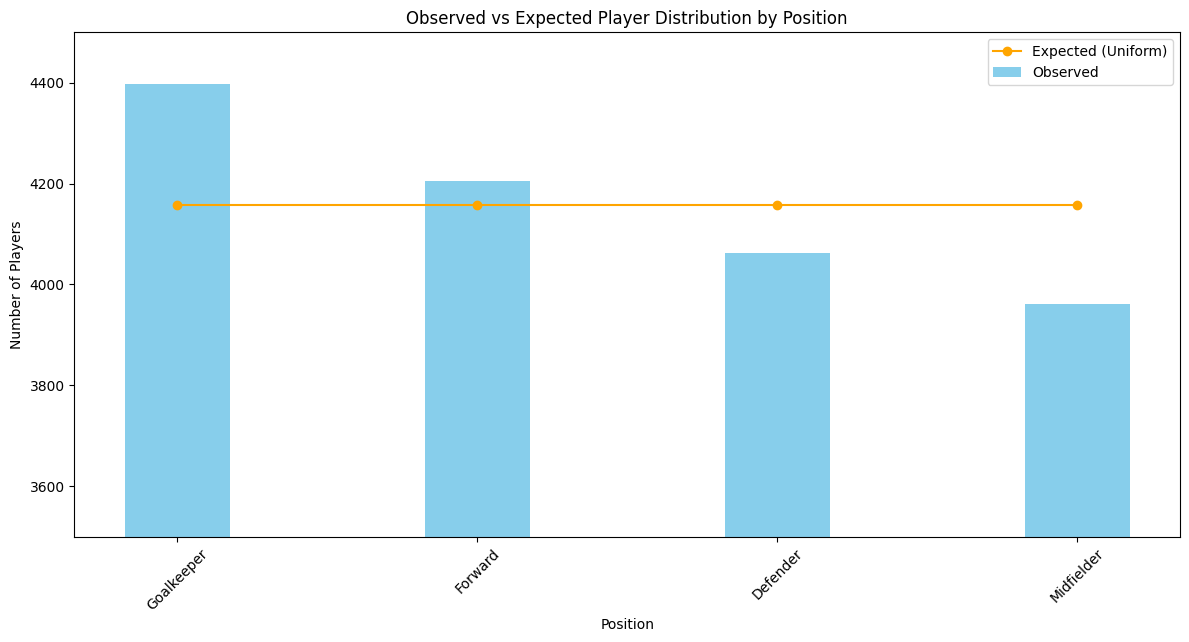

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the data
# Count players per position
position_counts = df["Position"].value_counts()

# Expected frequency for a uniform distribution
expected_frequency = [len(df) / len(position_counts)] * len(position_counts)

# Bar plot for observed frequencies
positions = position_counts.index
observed_values = position_counts.values
expected_values = np.array(expected_frequency)

x = np.arange(len(positions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, observed_values, width, label='Observed', color='skyblue')

# Line plot for expected frequencies
ax.plot(x, expected_values, label='Expected (Uniform)', color='orange', marker='o')

# Set y-axis limit
ax.set_ylim([3500, 4500])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Position')
ax.set_ylabel('Number of Players')
ax.set_title('Observed vs Expected Player Distribution by Position')
ax.set_xticks(x)
ax.set_xticklabels(positions)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()